<a href="https://colab.research.google.com/github/SondipPoulSingh/Machine-Learning/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Augmentation used in cases of


*   controlling Overfitting
*   Creating new images while training
[Read thKeras blog](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)<br>
[Read](https://towardsdatascience.com/data-augmentation-and-handling-huge-datasets-with-keras-a-simple-way-240481069376) Another Good Blog 


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
datagen = ImageDataGenerator(
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

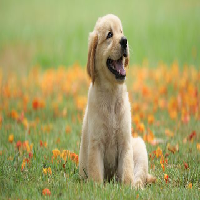

In [14]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/dogs/dog.jpg', target_size=(200,200))
img

In [ ]:
type(img)

PIL.Image.Image

In [15]:
# convert PIL (Python Imaging Library) image into numpy array
img = image.img_to_array(img)
type(img)

numpy.ndarray

In [16]:
#reshaping 
img = img.reshape(1,200,200,3)

In [17]:
# flow for single image, flow_from_directory for batches from a folder
i=0
for batch in datagen.flow(img,batch_size=1,save_to_dir='/content/drive/MyDrive/Colab Notebooks/dogs/augmented_dogs',
                          save_prefix='cat', save_format='jpeg'):
  i+=1
  if(i>=10):
    break

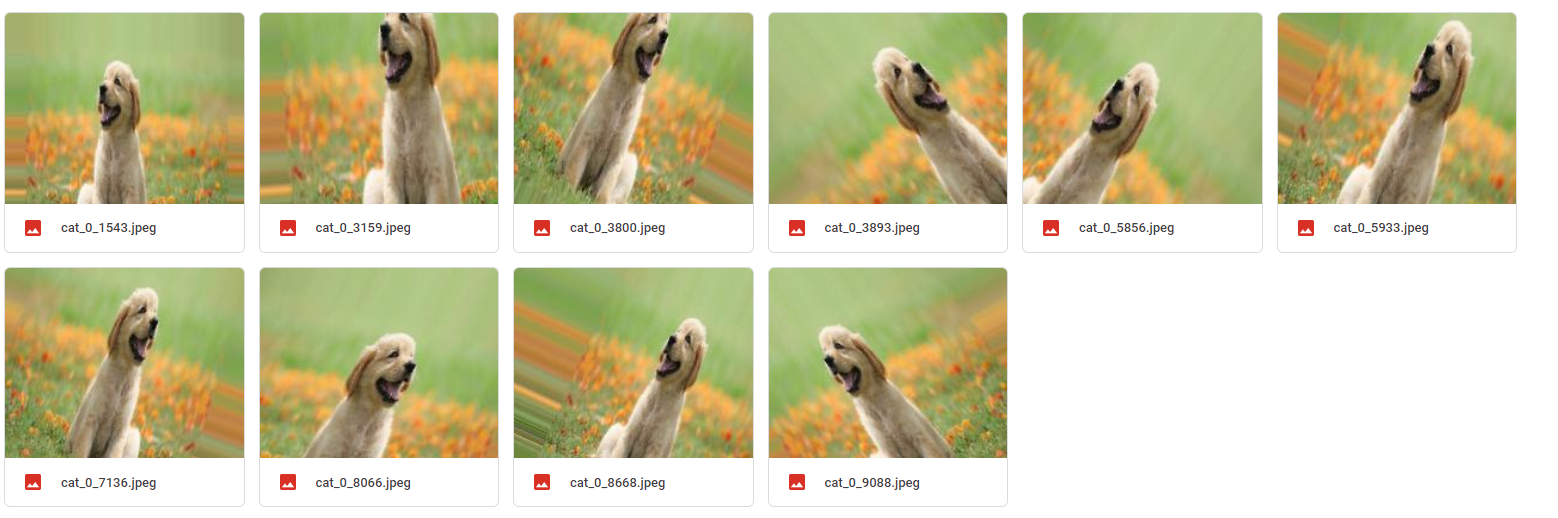

### Applying augmentation on a larger dataset

In [1]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download -d salader/dogs-vs-cats
# command from the dataset API https://www.kaggle.com/datasets/salader/dogs-vs-cats

100% 1.06G/1.06G [00:57<00:00, 16.0MB/s]
100% 1.06G/1.06G [00:57<00:00, 19.7MB/s]


In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile('/content/dogs-vs-cats.zip','r') as zip:
  zip.extractall('/content')

In [5]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rotation_range=30,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# this is a generator that will read pictures found in
# subfolers of 'content/train', and indefinitely generate
# batches of augmented image data

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256,256),
    class_mode='binary',
    batch_size=32
)

test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(256,256),
    class_mode='binary',
    batch_size=32
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


### Model

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),strides=(1, 1),padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64,(3,3),strides=(1, 1),padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128,(3,3),strides=(1, 1),padding='valid',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [11]:
model.fit_generator(train_generator,
                    steps_per_epoch=20000//32,
                    epochs=5,
                    validation_data=test_generator,
                    validation_steps=5000//32
                    )
model.save_weights('first_try.h5') 

<ipython-input-11-7e458ef57b2d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/5
625/625 [==============================] - 343s 534ms/step - loss: 1.4629 - accuracy: 0.5421 - val_loss: 0.6791 - val_accuracy: 0.5337
Epoch 2/5
625/625 [==============================] - 333s 532ms/step - loss: 0.6781 - accuracy: 0.5699 - val_loss: 0.6609 - val_accuracy: 0.5948
Epoch 3/5
625/625 [==============================] - 330s 527ms/step - loss: 0.6885 - accuracy: 0.5641 - val_loss: 0.6698 - val_accuracy: 0.6046
Epoch 4/5
625/625 [==============================] - 337s 540ms/step - loss: 0.6606 - accuracy: 0.5931 - val_loss: 0.6371 - val_accuracy: 0.6350
Epoch 5/5
625/625 [==============================] - 337s 540ms/step - loss: 0.6427 - accuracy: 0.6256 - val_loss: 0.6440 - val_accuracy: 0.6396
